# Подготовка данных

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from scipy.cluster.hierarchy import linkage

from src.distances import euclidean_distances, chebyshev_distances,\
    cosine_distances, convert_distance_to_similarity

sns.set_theme()

Считаем данные

In [17]:
data_x = pd.read_excel('data/X_4_2.xlsx', header=None)
data_x.head()

,0,1,2,3
0,4.874290,1.977885,3.814924,1.059366
1,3.933569,1.958831,1.990646,1.942923
2,3.922034,1.976142,1.915643,2.006392
3,4.214626,2.051924,2.273481,1.941145
4,5.432904,2.305590,3.949039,1.483865


In [18]:
data_y = pd.read_excel('data/Y_4_2.xlsx', header=None)
data_y.head()

,0,1,2,3
0,0.611272,-0.325375,0.097232,0.964296
1,2.024987,1.036112,2.438120,1.118366
2,1.903445,1.098594,1.898920,0.817923
3,0.999167,-0.047694,0.220158,0.943614
4,1.098056,0.905748,0.933541,1.008437


Исследуем данные на наличие пропусков

In [19]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [20]:
data_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
 1   1       200 non-null    float64
 2   2       200 non-null    float64
 3   3       200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Оба набора данных не содержат пропущенных значений

## Матрицы расстояний

В исследовании рассмотрим 3 способа вычисления расстояний: Евклидово, Чебышева и манхэттенское 

In [21]:
chebyshev_x = chebyshev_distances(data_x)
euclidean_x = euclidean_distances(data_x)
cosine_x = cosine_distances(data_x)

In [22]:
chebyshev_y = chebyshev_distances(data_y)
euclidean_y = euclidean_distances(data_y)
cosine_y = cosine_distances(data_y)

## Матрицы схожести и графовая модель

Для вычисления матрицы близости воспользуемся формулой: $similarity = \frac{1}{1 + distance}$

In [23]:
similarity_chebyshev_x = convert_distance_to_similarity(chebyshev_x)
similarity_euclidean_x = convert_distance_to_similarity(euclidean_x)
similarity_cosine_x = convert_distance_to_similarity(cosine_x)

similarity_chebyshev_y = convert_distance_to_similarity(chebyshev_y)
similarity_euclidean_y = convert_distance_to_similarity(euclidean_y)
similarity_cosine_y = convert_distance_to_similarity(cosine_y)

In [24]:
similarity_matrix = convert_distance_to_similarity(chebyshev_x)
similarity_matrix


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,1.0,0.354073,0.344913,0.393477,0.641596,0.414219,0.507266,0.497981,0.477167,0.518499,...,0.301238,0.318503,0.349716,0.433936,0.515617,0.339896,0.569981,0.68996,0.866636,0.908626
1,0.354073,1.0,0.93023,0.779524,0.338021,0.587291,0.283048,0.306318,0.269407,0.33802,...,0.583941,0.650395,0.729845,0.409521,0.425579,0.783954,0.397629,0.390345,0.374477,0.350371
2,0.344913,0.93023,1.0,0.736465,0.329663,0.583339,0.277164,0.299438,0.264071,0.329662,...,0.587901,0.655311,0.715085,0.399146,0.412415,0.791108,0.386114,0.379242,0.364246,0.341399
3,0.393477,0.779524,0.736465,1.0,0.373754,0.703394,0.30768,0.335373,0.291629,0.373752,...,0.501616,0.549878,0.605616,0.409819,0.426137,0.642409,0.429765,0.438789,0.418838,0.388911
4,0.641596,0.338021,0.329663,0.373754,1.0,0.392419,0.635093,0.689895,0.570301,0.729911,...,0.28954,0.305456,0.334048,0.349272,0.400314,0.325077,0.432328,0.498015,0.614588,0.613747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.339896,0.783954,0.791108,0.642409,0.325077,0.50548,0.273915,0.295649,0.26112,0.31797,...,0.695935,0.792429,0.849485,0.43781,0.405262,1.0,0.379837,0.373185,0.358655,0.336483
196,0.569981,0.397629,0.386114,0.429765,0.432328,0.381494,0.366865,0.361984,0.350859,0.372704,...,0.332197,0.353318,0.392143,0.645144,0.843898,0.379837,1.0,0.766233,0.593137,0.593922
197,0.68996,0.390345,0.379242,0.438789,0.498015,0.42317,0.413102,0.406923,0.392918,0.420521,...,0.327098,0.347555,0.385057,0.539046,0.671112,0.373185,0.766233,1.0,0.724183,0.725354
198,0.866636,0.374477,0.364246,0.418838,0.614588,0.44242,0.490233,0.481556,0.462065,0.500716,...,0.315881,0.334919,0.369607,0.447228,0.534494,0.358655,0.593137,0.724183,1.0,0.843201


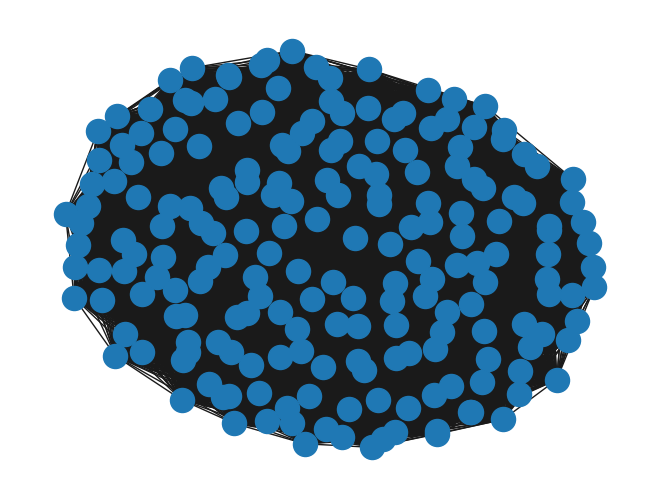

In [25]:
G = nx.Graph()
n = similarity_matrix.shape[0]

for i in range(n):
    for j in range(i, n):
        if i == j:
            continue
        weight = similarity_matrix[i][j]
        G.add_edge(i, j, weight=weight)

nx.draw(G)

# Кластеризация для числа кластеров k=2

# Кластеризация для числа кластеров k=3

# Общий случай